- sentiment analysis using lexical (vader) sentiment analysis
- compares the min/max and mean of sentiment across
- the original text,
- the openai generated text
- the deepseek generated text

In [2]:
import pandas as pd
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from prettytable import PrettyTable

In [3]:
with open('../0_data/statements.csv', 'r') as file:
    # headers = ['prompt', 'client', 'opt1', 'opt2', 'opt3', 'completion']
    df_generated = pd.read_csv(file, index_col=False)
    
df_generated.head()

,prompt,provider,temperature,top_p,max_tokens,statement,extremity_score
0,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,While the 2025 Trump administration's trade me...,-0.680280
1,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,In response to the 2025 Trump administration's...,-0.832605
2,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"While we, as the European Union, respect the a...",-0.047196
3,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"Thank you, Chair. In response to the 2025 Trum...",-0.546598
4,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"Ladies and Gentlemen, in response to the 2025 ...",-0.759760


In [4]:
with open ('../0_data/final_labeled_dataset.csv', 'r') as file:
    df_original = pd.read_csv(file)

df_original.head()

,speaker_name,party,language,mep_id,role,text,alignment,orientation,translated,translated_text,label
0,Jean-Marc | Germain,S-D,FR,256901,au nom du groupe,"Monsieur le Président, mes chers collègues, Mo...",Center-Left,Left,True,"Mr. Chairman, dear colleagues, Commissioner, t...",-0.5
1,Julien | Sanchez,PfE,FR,88552,au nom du groupe,"Monsieur le Président, nous débattons aujourd'...",Right,Right,True,"Mr. Chairman, today we are debating the politi...",1.0
2,Bogdan | Rzońca,ECR,PL,197545,au nom du groupe,Panie Przewodniczący! Panie Komisarzu! Wydaje ...,Right,Right,True,"Mr. Chairman, Mr. Commissioner, the document i...",0.7
3,Rasmus | Nordqvist,Verts/ALE,EN,257044,au nom du groupe,"Mr President, thank you to the co-rapporteurs,...",Center-Left,Left,True,"Mr President, thank you to the co-rapporteurs,...",-0.7
4,João | Oliveira,The Left,PT,257083,au nom du groupe,"Senhor Presidente, as propostas que apresentám...",Left,Left,True,"Mr. President, the proposals that we have pres...",-1.0


In [5]:
# VADER Sentiment analysis
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df_original['sentiment'] = df_original['translated_text'].apply(get_sentiment)
df_generated['sentiment'] = df_generated['statement'].apply(get_sentiment)

df_generated.head()

,prompt,provider,temperature,top_p,max_tokens,statement,extremity_score,sentiment
0,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,While the 2025 Trump administration's trade me...,-0.680280,0.9534
1,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,In response to the 2025 Trump administration's...,-0.832605,0.9489
2,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"While we, as the European Union, respect the a...",-0.047196,0.9682
3,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"Thank you, Chair. In response to the 2025 Trum...",-0.546598,0.9810
4,"[{'role': 'system', 'content': 'You are a EU p...",chatgpt,1,0.8,400,"Ladies and Gentlemen, in response to the 2025 ...",-0.759760,0.9325


In [ ]:
def get_descriptive_printout(sentiment_series):
    """Get descriptive statistics for a series of sentiment values"""
    # Calculate the statistics
    mean = sentiment_series.mean()
    std = sentiment_series.std()
    min_val = sentiment_series.min()
    max_val = sentiment_series.max()
    count = sentiment_series.count()
    
    # Return formatted values rounded to 2 decimal places
    return [
        round(mean, 2),
        round(std, 2),
        round(min_val, 2),
        round(max_val, 2),
        count
    ]

# Get sentiment statistics for original data
sentiment_original = get_descriptive_printout(df_original['sentiment'])

# Filter by provider is already defined in earlier cells
is_openai = df_generated['provider'] == 'chatgpt'
is_deepseek = df_generated['provider'] == 'deepseek'

# Get statistics for each provider
sentiment_openai_chatgpt = get_descriptive_printout(df_generated[is_openai]['sentiment'])
sentiment_openai_deepseek = get_descriptive_printout(df_generated[is_deepseek]['sentiment'])

# Create table
sentiment_table = PrettyTable()
sentiment_table.field_names = ['Source', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

sentiment_table.add_row(['Original', *sentiment_original])
sentiment_table.add_row(['ChatGPT', *sentiment_openai_chatgpt])
sentiment_table.add_row(['DeepSeek', *sentiment_openai_deepseek])

# Print table
print('Sentiment Analysis (Vader) Results:')
print(sentiment_table)






NameError: name 'is_openai' is not defined

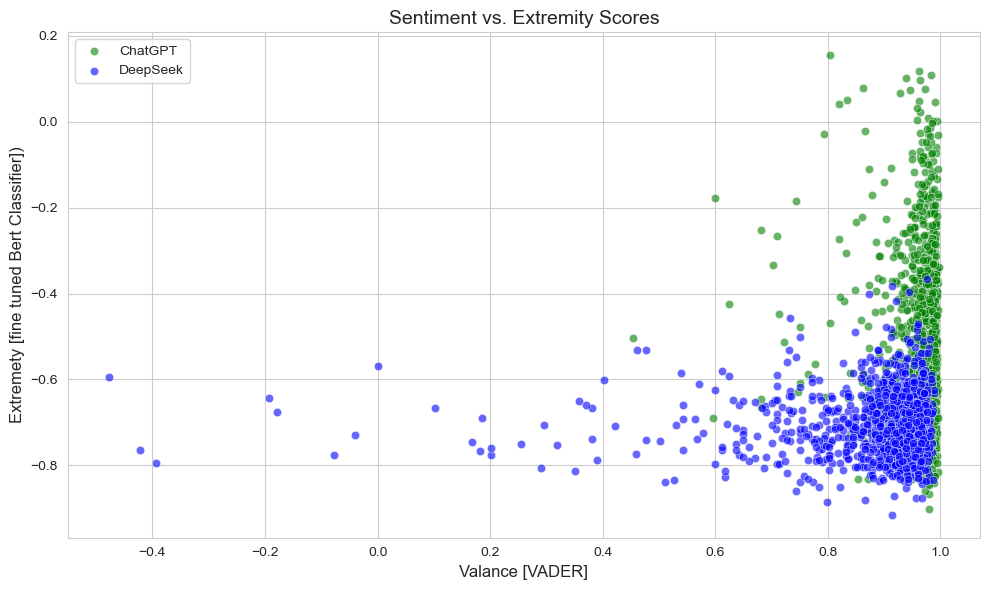

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn
# sns.scatterplot(x='sentiment', y='extremity_score', data=df_original, 
#                 alpha=0.6, label='Original', color='blue')

sns.scatterplot(x='sentiment', y='extremity_score', data=df_generated[is_openai], 
                alpha=0.6, label='ChatGPT', color='green')

sns.scatterplot(x='sentiment', y='extremity_score', data=df_generated[is_deepseek], 
                alpha=0.6, label='DeepSeek', color='blue')

# Add labels and title
plt.xlabel('Valance [VADER]', fontsize=12)
plt.ylabel('Extremety [fine tuned Bert Classifier])', fontsize=12)
plt.title('Sentiment vs. Extremity Scores', fontsize=14)

plt.tight_layout()
plt.show()
